In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Result.csv", encoding='latin1')

In [6]:
df.head()

,incident_id,received_year,received_month,source,state,incident_year,incident_month,external_cause,product_1,product_1_hazard,...,victim_2_injury,victim_2_body_part,victim_2_severity,victim_3_gender,victim_3_age_years,victim_3_age_months,victim_3_injury,victim_3_body_part,victim_3_severity,incident_description
0,20230105-B0514-2147351619,2023,1,Consumer,NY,2023.0,1.0,NaN,"Dolls, Plush Toys, and Action Figures (1394)",Electrical - Other Electrical malfunction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,THE CONSUMER REPORTED THAT THE DRAGON TOY'S BA...
1,20230106-16BCF-4043294,2023,1,Medical Examiner and Coroner,IN,2022.0,7.0,NaN,Stairs or Steps (1842),Mechanical - Fall,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54 YOF DECEDENT FELL BACKWARDS DOWN FLIGHT OF ...
2,20230106-05FA2-4042394,2023,1,Medical Examiner and Coroner,IN,2021.0,10.0,NaN,"Two-wheeled, Powered, Off-road Vehicles (5036)",Mechanical - Collision,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 YOM DECEDENT WAS THE DRIVER OF DIRT BIKE TH...
3,20230106-15210-4042318,2023,1,Medical Examiner and Coroner,IN,2020.0,11.0,NaN,"Bicycles and Accessories, (Excl.mountain or Al...",Mechanical - Collision,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,THE 73 YOM DECEDENT WAS STRUCK BY AN AUTOMOBIL...
4,20230110-7B110-4054306,2023,1,Other Clipping Service,VA,2022.0,8.0,NaN,Gas Water Heaters (118),Thermal - Fire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CREWS ARRIVED IN HEAVY SMOKE COMING FROM THE F...


In [7]:
df.shape

(20908, 33)

In [8]:
len(df["product_1"].unique())

# There are 589 unique products

589

In [9]:
len(df["incident_year"].unique())

32

In [10]:
df.sort_values(by="incident_year", ascending=True).head()

,incident_id,received_year,received_month,source,state,incident_year,incident_month,external_cause,product_1,product_1_hazard,...,victim_2_injury,victim_2_body_part,victim_2_severity,victim_3_gender,victim_3_age_years,victim_3_age_months,victim_3_injury,victim_3_body_part,victim_3_severity,incident_description
11866,20230614-BAE41-2147347014,2023,6,Consumer,CA,1920.0,3.0,NaN,Games or Game Parts (Excl Marbles & Computer G...,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"FOUR INDIVIDUALS, WHO HAD PLAYED WITH GAME BOA..."
5826,20231229-FA976-2147343159,2023,12,Consumer,IL,1922.0,10.0,NaN,Gas Ranges or Ovens (279),Thermal - Fire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GAS WILL TURN ON EASY WHEN BUMPING INTO GAS KN...
10396,20230404-33308-4162000,2023,4,Medical Examiner and Coroner,ME,1964.0,1.0,NaN,"Bicycles and Accessories, (Excl.mountain or Al...",Mechanical,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,THE MALE SUBJECT [HAD A] BICYCLE ACCIDENT IN Y...
19275,20230928-CA430-4402824,2023,9,Medical Examiner and Coroner,NaN,1975.0,1.0,NaN,"Swimming Pools, Not Specified (1284)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85 YOM DECEDENT FELL INTO EMPTY POOL AT AGE 38...
11921,20230601-D9D69-2147347249,2023,6,Consumer,CO,1976.0,7.0,NaN,Games or Game Parts (Excl Marbles & Computer G...,Other,...,Other/Not Stated,Not Recorded,Death,NaN,NaN,NaN,NaN,NaN,NaN,24 YO AND 25 YO PEOPLE WERE KILLED WHEN A SERI...


In [11]:
# Q) how much data do we need. I'm just using 2023's data!!?

# Q) text analysis for "incident_description" column??

#

#


In [12]:
df.groupby("state").size().head()

state
AK     112
AL     234
AR     179
AZ     334
CA    1966
dtype: int64

In [13]:
state_df = pd.DataFrame(df.groupby("state").size(), columns=["count"])
state_df.reset_index(inplace=True)

In [14]:
state_df.head()

,state,count
0,AK,112
1,AL,234
2,AR,179
3,AZ,334
4,CA,1966


In [15]:
state_df.columns

Index(['state', 'count'], dtype='object')

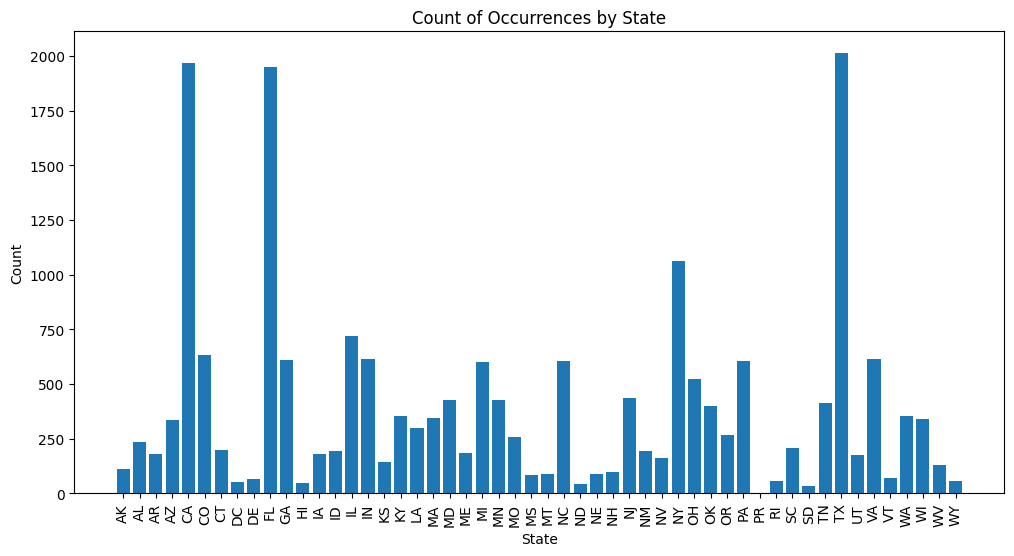

In [16]:
# Create a figure and axes objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart on the axes
ax.bar(x=state_df["state"], height=state_df["count"])

# Set labels and title
ax.set_xlabel("State")
ax.set_ylabel("Count")
ax.set_title("Count of Occurrences by State")

# Rotate x-axis labels by 90 degrees
ax.tick_params(axis='x', rotation=90)

# Show plot
plt.show()

In [17]:
# top 5 states

state_df.sort_values(by = "count", ascending=False).head(5)

,state,count
44,TX,2011
4,CA,1966
9,FL,1950
34,NY,1062
14,IL,720


In [18]:
# get top Products
product_df = pd.DataFrame(df.groupby("product_1").size(), columns=["count"])
product_df.reset_index(inplace=True)

product_df.sort_values(by = "count", ascending=False).head(10)

,product_1,count
249,General Home or Room Involvement In Fires (1866),2377
60,"Bicycles and Accessories, (Excl.mountain or Al...",1499
8,All Terrain Vehicles (# of Wheels Unspecified/...,880
516,"Swimming Pools, Not Specified (1284)",814
56,"Beds or Bedframes, Other or Not Specified (4076)",674
50,Bathtubs or Showers (611),666
452,Refrigerators (276),535
449,"Ranges or Ovens, Not Specified (281)",505
363,Other Cookware (465),394
9,All Terrain Vehicles (Four Wheels/off Road Onl...,370


In [59]:
incident_description = df["incident_description"].tolist()

In [60]:
# Find Nan value

for i, description in enumerate(df['incident_description']):
    if isinstance(description, float):
        print(f"Row {i}: {description}")

# Remove Nan
df= df[df['incident_description'].notna()]

In [61]:
# From Perplexity. I uploaded the Result.csv on Perplexity. 
# My Prompt: how to analyze the incident_description column?

import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Assuming 'df' is your DataFrame
incident_description = df["incident_description"].tolist()

# Function to clean and preprocess text
def clean_text(text):
    cleaned = text.lower().replace('\n', ' ')
    tokens = nltk.word_tokenize(cleaned)
    cleaned_tokens = [token for token in tokens if token.isalnum() and token not in stopwords.words('english')]
    return ' '.join(cleaned_tokens)

# Apply the clean_text function to each description
cleaned_descriptions = []
for description in incident_description:
    cleaned_descriptions.append(clean_text(description))

# Create a frequency distribution of the words
word_freq = Counter(' '.join(cleaned_descriptions).split())

# Find the most common words
most_common_words = word_freq.most_common(10)
print("Most common words:", most_common_words)


Most common words: [('fire', 13800), ('decedent', 8596), ('yom', 5665), ('cod', 5638), ('home', 5394), ('death', 5260), ('accident', 4587), ('autopsy', 4212), ('injuries', 4180), ('found', 4002)]
